# Binary Classifiction Auto ML
This application is a binary classification AUTO ML which runs 6 different models and chooses the best one based on the score picked by user. After running this program, you will get the score diagram of all models, ROC chart of the best model, and pickled files of all 6 models.

Models used in this Auto ML
Models used in this application: 1- Decision Tree 2- Random Forest 3- K Nearest Neighbors 4- NeuralNetwork 5- SVM 6- Logistic Regression

## How to run Classification Auto ML?
    1-  Copy all the files in this directory in your computer

    2- Make a virtual environment with a fresh Python version=3.7 for example if you use conda:
       "conda create --name env_name python=3.7"

    3- Go to the application folder that you have already copied and using pip, run the following command
       to install all the required Python modules used in this application.

       "pip install -r requirements.txt"

       Note: It may take a couple of minutes to install all modules, do not stop the installation early if there is no
       either error or success messages.

    4- Initialize the config.ini with these parameters using a text editor like notepad.exe:

        filename:  Full path of the input file. This app assumes that all test and training data are integrated in
        one csv file.
        Example: C:/Users/danta/PycharmProjects/automl_ad/diabet.csv

        test_size = The size of test data you want be chooses off the whole data. This number is between 0 and 1.
        Example: 0.25

        target: The target column of your data
        Example: class

        scoring_type: The type of score you want Auto ML chooses the model based on. For this application available options
        are: [accuracy, precision, average_precision_score, f1_score, log_loss, recall]
        Example: accuracy

    5-  After initializing the config.ini, please run the "Panel.py" file or keep executing the next cells of this file.

## How to add a new model to this Auto Model?
    Please refer to help document of this application ("help.txt"). 

### Import Modules

In [1]:
from Models_List import models_dict
from AutoModel import DataModel
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from configparser import ConfigParser

Using TensorFlow backend.


### Fetch the Parameters

In [2]:
parser = ConfigParser()
parser.read('config.ini')
filename = parser.get('files', 'filename')
test_size = eval(parser.get('model', 'test_size'))
target = parser.get('model', 'target')
scoring_type = parser.get('model', 'scoring_type')

### Create an instance of experiment

In [3]:
experiment = DataModel(filename, scoring_type, test_size=test_size, target=target)

### Trigger the experiment

In [4]:
results = []
models_list = []
scores_list = []
model_files_list = []

for model_name, model in models_dict.items():
    score, model_file = list(experiment.run(model_name, model))
    results.append({model_name: [score, model_file]})
    models_list.append(model_name)
    scores_list.append(score)
    model_files_list.append(model_file)

Score on test data by Decision Tree is: 0.5625
Score on test data by Random Forest is: 0.6446280991735538
Score on test data by SVM is: 0.6434782608695653
Score on test data by KNN is: 0.6559999999999999
Score on test data by Logistic Regression is: 0.6495726495726495






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 576 samples, validate on 193 samples
Epoch 1/30





 - 1s - loss: 0.6585 - val_loss: 0.6710
Epoch 2/30
 - 0s - loss: 0.6619 - val_loss: 0.6589
Epoch 3/30
 - 0s - loss: 0.6539 - val_loss: 0.6551
Epoch 4/30
 - 0s - loss: 0.6502 - val_loss: 0.6507
Epoch 5/30
 - 0s - loss: 0.6480 - val_loss: 0.6499
Epoch 6/30
 - 0s - loss: 0.6467 - val_loss: 0.6438
Epoch 7/30
 - 0s - loss: 0.6406 - val_loss: 0.6442
Epoch 8/30
 - 0s - loss: 0.6415 - val_loss: 0.6387
Epoch 9/30
 - 0s - loss: 0.6366 - val_loss: 0.6362
Epoch 10/30
 - 0s - loss: 0.6347 - val_loss: 0.6330
Epoch 11/30
 - 0s - loss: 0.6309 - val_loss: 0.6332
Epoch 12/30
 -

### Calculate and show the scores

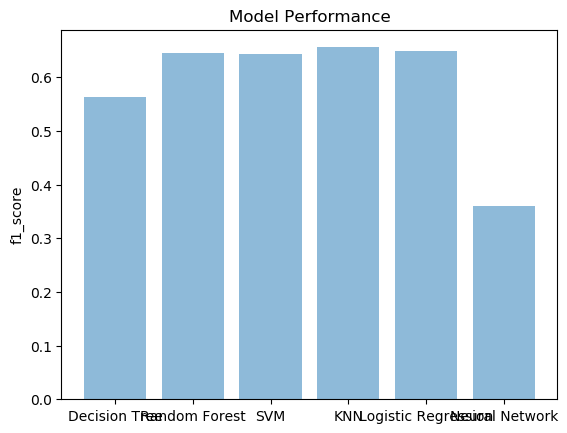

In [5]:
best_score = max(scores_list)
best_score_index = scores_list.index(best_score)
best_model = models_list[best_score_index]
best_model_file = model_files_list[best_score_index]
y_pos = np.arange(len(models_list))
scores = scores_list
plt.bar(y_pos, scores_list, align='center', alpha=0.5)
plt.xticks(y_pos, models_list)
plt.ylabel(scoring_type)
plt.title('Model Performance')
plt.show()

### Create ROC

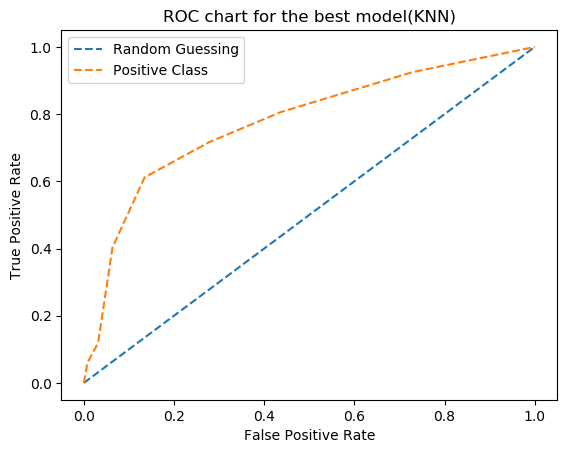

In [6]:
experiment.roc(best_model_file, best_model)